In [1]:
# Import the Labraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborna as sns
plt.style.use('fivethirtyeight')

In [2]:
# Twitter API Credentials
consumerKey = '****************'
consumerSecret = '*******************'
accessToken = '************************'
accessTokenSecret = '****************************'

In [3]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret) 
    
# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret) 
    
# Creating the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [4]:
# Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name="elonmusk", count = 100, lang ="en", tweet_mode="extended")

#  Print the last 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Show the 5 recent tweets:

1) @ValaAfshar @Tesla Tesla Giga Shanghai team has done amazing work!

2) And finally https://t.co/TcgwMSyjAy

3) @itsALLrisky Or does he? https://t.co/9zrivQJTQO

4) @brandonbernicky 2 weeks

5) https://t.co/C3xC2J0K0o



In [5]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df.head()

,Tweets
0,@ValaAfshar @Tesla Tesla Giga Shanghai team ha...
1,And finally https://t.co/TcgwMSyjAy
2,@itsALLrisky Or does he? https://t.co/9zrivQJTQO
3,@brandonbernicky 2 weeks
4,https://t.co/C3xC2J0K0o


In [6]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,Tweets
0,Tesla Giga Shanghai team has done amazing work!
1,And finally
2,Or does he?
3,2 weeks
4,
5,
6,
7,🤣
8,_feed Haha
9,


In [7]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,Tesla Giga Shanghai team has done amazing work!,0.900000,0.750000
1,And finally,1.000000,0.000000
2,Or does he?,0.000000,0.000000
3,2 weeks,0.000000,0.000000
4,,0.000000,0.000000
5,,0.000000,0.000000
6,,0.000000,0.000000
7,🤣,0.000000,0.000000
8,_feed Haha,0.300000,0.200000
9,,0.000000,0.000000


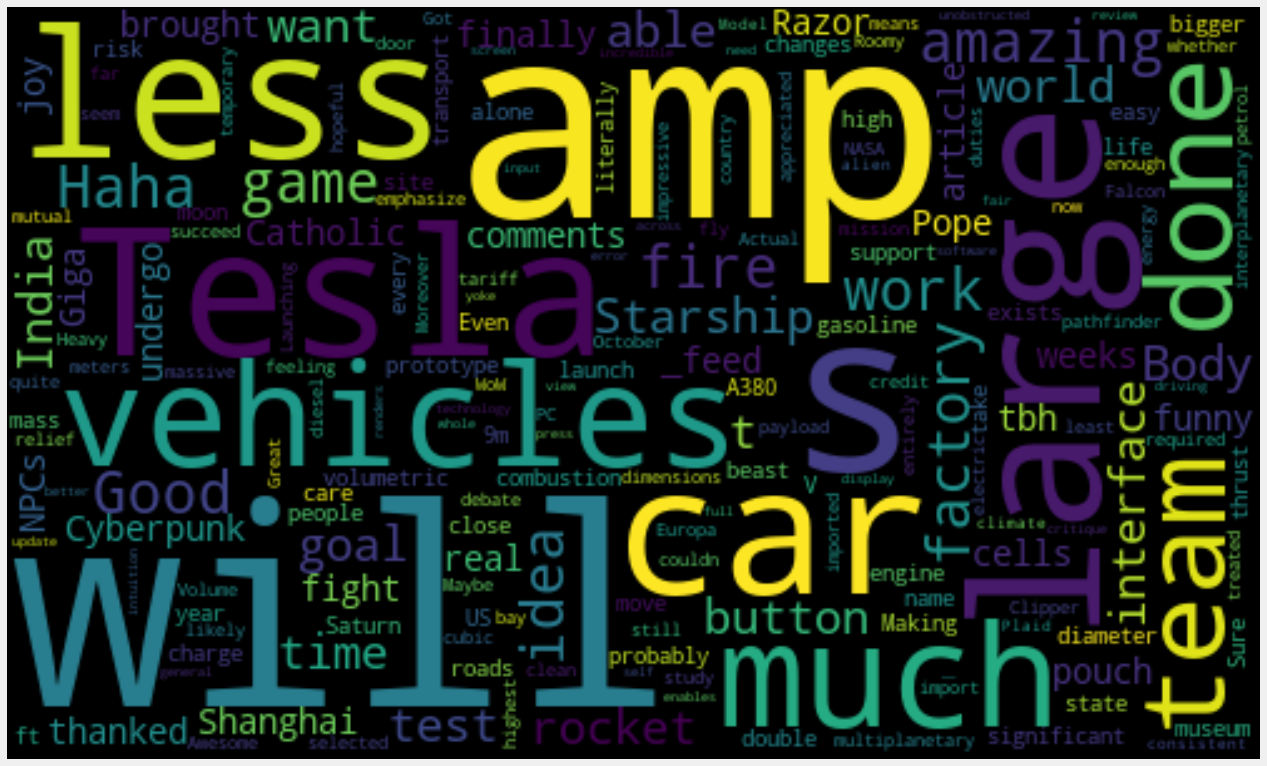

In [8]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
plt.figure(figsize = (20,20))
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [9]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,Tesla Giga Shanghai team has done amazing work!,0.900000,0.750000,Positive
1,And finally,1.000000,0.000000,Neutral
2,Or does he?,0.000000,0.000000,Neutral
3,2 weeks,0.000000,0.000000,Neutral
4,,0.000000,0.000000,Neutral
5,,0.000000,0.000000,Neutral
6,,0.000000,0.000000,Neutral
7,🤣,0.000000,0.000000,Neutral
8,_feed Haha,0.300000,0.200000,Positive
9,,0.000000,0.000000,Neutral


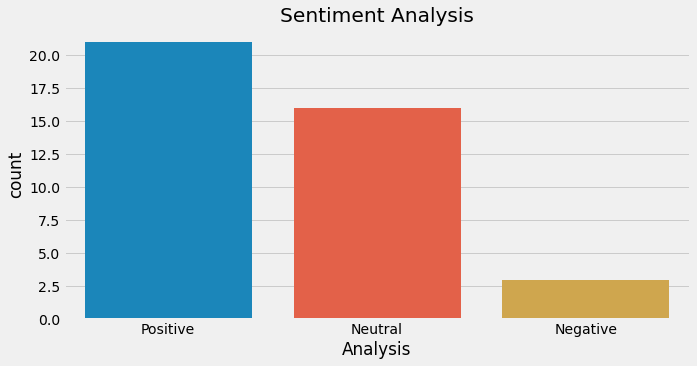

In [19]:
# Plotting and visualizing the counts
plt.figure(figsize = (10, 5))
plt.title('Sentiment Analysis')
sns.countplot(x = 'Analysis', data=df)
plt.show()

In [20]:
df

,Tweets,Subjectivity,Polarity,Analysis
0,Tesla Giga Shanghai team has done amazing work!,0.900000,0.750000,Positive
1,And finally,1.000000,0.000000,Neutral
2,Or does he?,0.000000,0.000000,Neutral
3,2 weeks,0.000000,0.000000,Neutral
4,,0.000000,0.000000,Neutral
5,,0.000000,0.000000,Neutral
6,,0.000000,0.000000,Neutral
7,🤣,0.000000,0.000000,Neutral
8,_feed Haha,0.300000,0.200000,Positive
9,,0.000000,0.000000,Neutral
